# Task a

In [3]:
from parameters import *
from functions import *
from PDE_solutions import *

walks = 5000
N = 200

1.0000000000000007


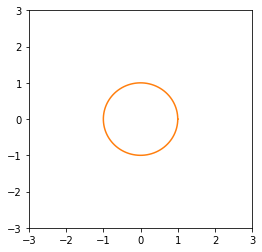

In [6]:
#np.random.seed(SEED) #scipy is based on the numpy seed
X, finalTime = NaiveRandomWalk(X0, 1000, T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime)

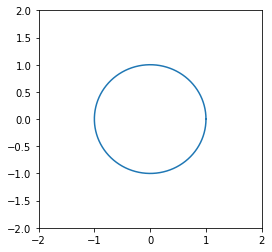

In [7]:
#plots a lot of walks
plt.figure(figsize=[4,4])
for i in range(300):
    X, finalTime = NaiveRandomWalk(X0, 100, T)
    X = X.T
    plt.plot(X[0,:],X[1,:], '.-')
plt.xlim([-2,2])
plt.ylim([-2,2])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))


# MC simulation

In [8]:
walks = 20000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-1.5,1]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10

Number of simulations: 20000. Time needed = 5.72 s
Estimated variance: 0.4954147245363871
The estimated probability at [-1.5, 1] is: 0.56765 (using MC)
Confidence interval: [ 0.56765 +- 0.006866387175725852 ]	with P = 0.95%
20

Number of simulations: 20000. Time needed = 10.66 s
Estimated variance: 0.4867723876390981
The estimated probability at [-1.5, 1] is: 0.6143 (using MC)
Confidence interval: [ 0.6143 +- 0.006746605448819443 ]	with P = 0.95%
50


KeyboardInterrupt: 

In [5]:
walks = 20000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-1.5, 2.]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10

Number of simulations: 20000. Time needed = 10.42 s
Estimated variance: 0.2295408339483903
The estimated probability at [-1.5, 2.0] is: 0.0558 (using MC)
Confidence interval: [ 0.0558 +- 0.0031814077387457423 ]	with P = 0.95%
20

Number of simulations: 20000. Time needed = 21.18 s
Estimated variance: 0.24653202409006647
The estimated probability at [-1.5, 2.0] is: 0.065 (using MC)
Confidence interval: [ 0.065 +- 0.0034169035452103202 ]	with P = 0.95%
50

Number of simulations: 20000. Time needed = 51.09 s
Estimated variance: 0.26508472418370277
The estimated probability at [-1.5, 2.0] is: 0.07605 (using MC)
Confidence interval: [ 0.07605 +- 0.0036740416876368392 ]	with P = 0.95%
100

Number of simulations: 20000. Time needed = 102.96 s
Estimated variance: 0.27573790375930995
The estimated probability at [-1.5, 2.0] is: 0.0829 (using MC)
Confidence interval: [ 0.0829 +- 0.003821693446851529 ]	with P = 0.95%
200

Number of simulations: 20000. Time needed = 228.55 s
Estimated variance

([0.0558,
  0.065,
  0.07605,
  0.0829,
  0.0882,
  0.09315,
  0.09255,
  0.0965,
  0.0967,
  0.0971],
 [[0.05261859226125426, 0.058981407738745745],
  [0.06158309645478968, 0.06841690354521032],
  [0.07237595831236317, 0.07972404168763685],
  [0.07907830655314847, 0.08672169344685153],
  [0.08426944097771166, 0.09213055902228834],
  [0.08912162962075644, 0.09717837037924355],
  [0.08853329626909441, 0.09656670373090558],
  [0.0924074125253488, 0.1005925874746512],
  [0.09260362716184901, 0.10079637283815097],
  [0.09299607252662913, 0.10120392747337088]])

In [9]:
walks = 20000
N = [10,20,50,100,200,500,1000,2000,5000,10000]
X0 = [-2, 0]
prob=[]
conf_int=[]
for n in N:
    print(n)
    mean, std, LB, UB = BasicMonteCarlo(X0,walks=walks, N=n, verbose=1)
    prob.append(mean)
    conf_int.append([LB,UB])
prob, conf_int

10


KeyboardInterrupt: 

In [20]:
def MCWithPilotRun(X0, walks_pilot, N, precision, T = 1, confidence = 0.95, 
                    seed = 1, tol = 1e-6, PDEProb = -1, verbose = 2):

    # pilot run
    _, std, _, _ = BasicMonteCarlo(X0 = X0, walks = walks_pilot, N = N, T = T, confidence = confidence, tol = tol,
                    PDEProb = PDEProb, seed = seed, verbose = (verbose >=2)*2 )

    # compute the necessary walks
    alfa = 1 - confidence
    C_alfa2 = st.norm.ppf(1-alfa/2) # a lot of walks, norm is good approx. of t
    walks = int( (2*C_alfa2*std/precision)**2 )
    if verbose>=2: print('\n')
    if verbose>=1: 
        print('Pilot run terminated.')
        print(f'Calling MC method with {walks} walks...\n')

    # MC simulation
    start = time.time()
    mean, std, LB, UB = BasicMonteCarlo(X0 = X0, walks = walks, N = N, T = T, confidence = confidence, tol = tol,
                    PDEProb = PDEProb, seed = 2*seed, verbose = (verbose >=2)*2 )
    end = time.time()
    
    if verbose == 1: #if it is >1 it has already been printed
        print(f'\nNumber of simulations: %d. Time needed = %.2f s' % (walks, end-start))
        print(f'Estimated variance: {std}' % (std))
        print(f'The estimated probability at {X0} is: {mean} (using MC)')
        print(f'Confidence interval: [ {mean} +- {UB-mean} ]\twith P = {confidence}%')
        if PDEProb != -1:
            print(f'\nPDE result at {X0} is:  {PDEProb}')

    return mean, std, LB, UB

In [24]:
print(f'ciao '
      '{4}' 
     )

ciao {4}
